In [ ]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import glob
from sklearn.metrics import accuracy_score

'''
각종 필요한 모듈 임포트해오는부분
'''



In [ ]:
#지금까지 모은 모든 데이터 numpy로 변환작업

# 분류 대상 카테고리 선택하기 
accident_dir = "/content/drive/MyDrive/Test"
categories = ["plastic", "trash","glass","metal" ]
nb_classes = len(categories)
# 이미지 크기 지정 
image_w = 128 
image_h = 128
pixels = image_w * image_h * 3
# 이미지 데이터 읽어 들이기 
X = []
Y = []
for idx, cat in enumerate(categories):
    # 레이블 지정 
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    # 이미지 
    image_dir = accident_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) 
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)      # numpy 배열로 변환
        X.append(data)
        Y.append(label)
        if i % 10 == 0:
            print(i, "\n", data)
X = np.array(X)
Y = np.array(Y)
# 학습 전용 데이터와 테스트 전용 데이터 구분 
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.99, stratify=Y)
xy = (X_train, X_test, y_train, y_test)

np.save("/content/drive/MyDrive/Test(4-RecyclingTrash1.1.npy", xy)
print("ok,", len(Y))

'''
이미지를 그대로 읽어들일 수 없어서 배열로 변환 해야함.
이미지 7000장 을  numpy배열로 변환하고 npy 파일로 저장해놓음

이미지데이터 제너레이터를 돌려서 모델을 학습시켰는데 컨퓨전 매트릭스가 안 좋아서
교수님 피드백 받은대로 해봤는데 해결 못해서 
원래 모델 사용하기로 결정
'''

0 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
10 
 [[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[247 247 247]
  [247 247 247]
  [247 247 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os


## 먼저 기존의 np.load를 np_load_old에 저장해둠.
np_load_old = np.load

## 기존의 parameter을 바꿔줌
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
#위의 코드를 이용하여 기존의 np.load를 바꿔주고, 다시 기존의 것을 사용하고 싶다면 다음과 같이 다시 불러오면 된다.
np.load = np_load_old

# 카테고리 지정하기
categories = ["plastic", "trash","glass","metal" ]
nb_classes = len(categories)

# 이미지 크기 지정하기
image_w = 128
image_h = 128

# 데이터 열기 
X_train,  X_test, y_train  , y_test = np.load("/content/drive/MyDrive/npy/4-RecyclingTrash1.3.npy", allow_pickle=True)


# 데이터 정규화하기(0~1사이로)
X_train = X_train.astype("float") / 256
X_test  = X_test.astype("float")  / 256


print(X_train.shape,X_test.shape,  y_train.shape, y_test.shape)

#원본

#6812 장
#일반쓰레기 약 1000장
#플라스틱 약 1600장
#캔 약 1500장
#유리 약2600장
'''
npy에 저장된 numpy들을 불러들여서 사이즈를 128 x 128로 모두 resize한 후 0~1사이로 정규화를 진행
'''



(5449, 128, 128, 3) (1363, 128, 128, 3) (5449, 4) (1363, 4)


In [ ]:
from keras import optimizers
from keras.layers import BatchNormalization, Dropout

# 모델 구조 정의 

def Deep_CNN():
  model = Sequential()

#1
  model.add(Conv2D( 64, (3, 3), input_shape=(128,128, 3), padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

#2
  model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

#3
  model.add(Conv2D(64, (3, 3),padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  #4
  model.add(Conv2D(64, (3, 3),padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

#5
  model.add(Conv2D(64, (3, 3),padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

#6
  model.add(Conv2D(64, (3, 3),padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
#7
  model.add(Conv2D(64, (3, 3),padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # 전결합층
  model.add(Flatten())    # 벡터형태로 reshape
  model.add(Dense(256, kernel_initializer='he_normal'))   # 출력
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(nb_classes , Activation('softmax'), kernel_initializer='he_normal'))

  return model

model = Deep_CNN()
model.summary() #구조파악

'''
CNN 모델설계 
필터는 거의 64개를 사용하고 필터사이즈는 3x3  
he_normal로 가중치 초기화를 함  필요하면 사이트 참고 (https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/)
DropOut 사이트 참조(https://sacko.tistory.com/45)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_62 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_63 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 64, 64, 64)       

In [ ]:
# 모델 구축하기
from keras import optimizers
from keras.models import Model

adam = optimizers.Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])

'''
분류 할 대상이 여러개라 categorical_crossentropy (다중 분류 손실함수) 사용하고 옵티마이저는 adma 학습률 0.001
'''

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from keras.models import load_model
import tensorflow as tf
import os

# 학습 완료된 모델 저장
h5_file = "/content/drive/MyDrive/Model/21.06.06/(Aug)5Layer_Trash2.6.h5"

if os.path.exists(h5_file):
    # 기존에 학습된 모델 불러들이기
    model=load_model(h5_file,custom_objects={'Activation':Activation})

else:
    # 학습한 모델이 없으면 파일로 저장\

    # model_checkpoint 및 early_stopping 사이트 참조 (https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=baek2sm&logNo=222013688414)
    
    model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/SavePoint/5Layer_Trash2.7/{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, batch_size=64, epochs=100,  callbacks=[model_checkpoint], validation_split = 0.2, verbose=True, shuffle=True)
    model.save(h5_file)

   




In [ ]:
import matplotlib.pyplot as plt 


#모델 시각화 train, val 의 정확도 그래프 그리기 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

#모델 시각화 train, val 의 loss 그래프 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
# 모델 평가하기 
score = model.evaluate(x_test, y_test)
print('loss=', score[0])        # loss
print('Test accuracy=', score[1])    # acc

In [ ]:
'''
여기서 부터는 이미 학습된 모델을 불러들여서 사용하기 위한 코드
'''

from keras.models import load_model
import tensorflow as tf
import os


h5_file = "/content/drive/MyDrive/Model/7Drop_Trash2.6.h5"

# 기존에 학습된 모델 불러들이기
model=load_model(h5_file,custom_objects={'Activation':Activation})

#model.summary()

In [ ]:

x_train, x_test, y_train, y_test = np.load("/content/drive/MyDrive/npy/4-RecyclingTrash1.4.npy", allow_pickle=True)

# 데이터 정규화하기(0~1사이로)
x_train = x_train.astype("float") / 256
x_test  = x_test.astype("float")  / 256
print( x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5768, 128, 128, 3) (1443, 128, 128, 3) (5768, 4) (1443, 4)


In [ ]:
# 모델 평가하기 
score = model.evaluate(x_test, y_test)
print('loss=', score[0])        # loss
print('Test accuracy=', score[1])    # acc

43/43 [==============================] - 25s 14ms/step - loss: 0.7405 - accuracy: 0.8775
loss= 0.740545928478241
Test accuracy= 0.877476155757904


In [ ]:
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis)


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['plastic', 'trash', 'glass', 'metal']
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

'''
각종 성능지표들 설명 사이트참조 https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html
'''

Classification Report
              precision    recall  f1-score   support

     plastic       0.83      0.87      0.85       382
       trash       0.90      0.74      0.81       195
       glass       0.90      0.92      0.91       509
       metal       0.88      0.90      0.89       277

    accuracy                           0.88      1363
   macro avg       0.88      0.86      0.87      1363
weighted avg       0.88      0.88      0.88      1363



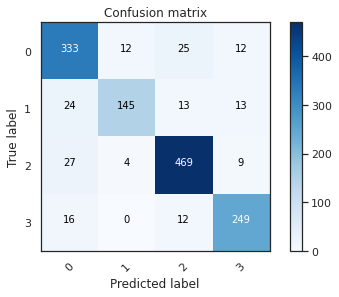

In [ ]:
import sklearn.metrics as metrics


categories = ["plastic", "trash","glass","metal" ]
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
    	cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    	plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(Y_true, Y_pred_classes)
#sns.heatmap(cm, annot=True)

plot_confusion_matrix(cm, range(4) )
#0 - plastic
#1 - trash
#2 - glass
#3 - metal






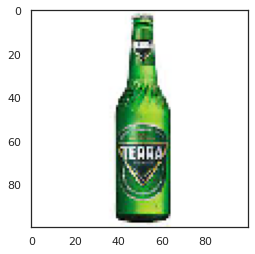

    ------->   Predict:  metal





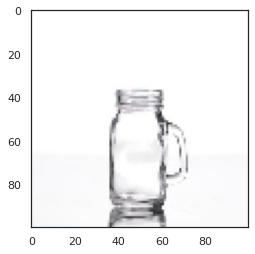

62.jpg    ------->   Predict:  metal





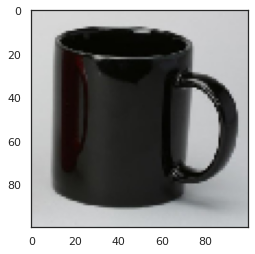

66.jpg    ------->   Predict:  metal





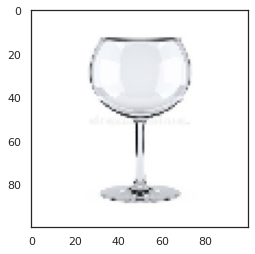

71.jpg    ------->   Predict:  metal





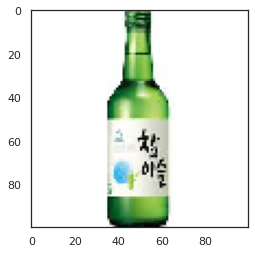

72.jpg    ------->   Predict:  metal





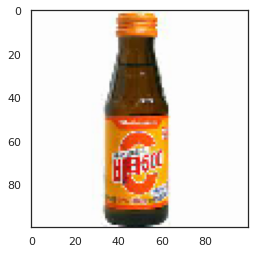

76.jpg    ------->   Predict:  metal





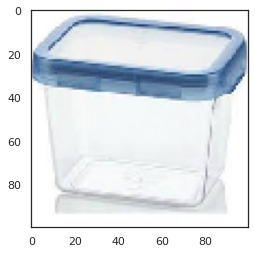

ic354.j    ------->   Predict:  metal





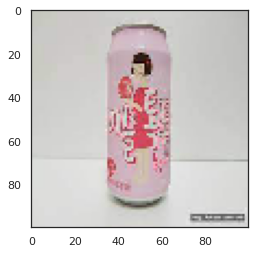

127.jpg    ------->   Predict:  metal





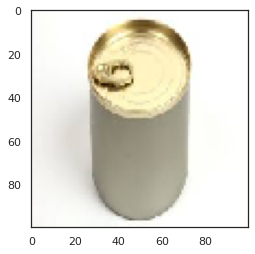

137.jpg    ------->   Predict:  metal





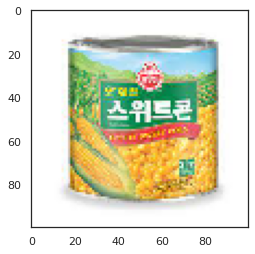

138.jpg    ------->   Predict:  metal





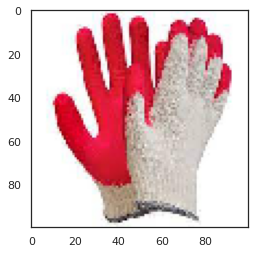

73.jpg    ------->   Predict:  metal





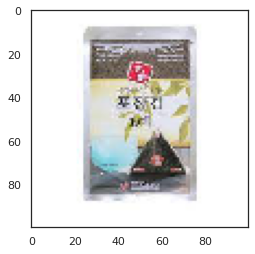

75.jpg    ------->   Predict:  metal





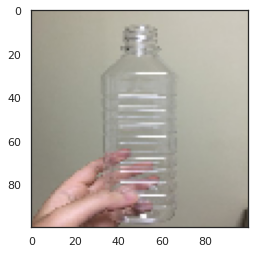

ic341.j    ------->   Predict:  metal





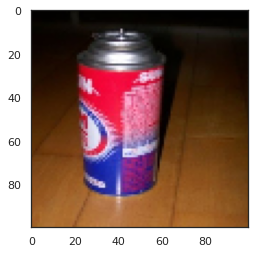

141.jpg    ------->   Predict:  plastic





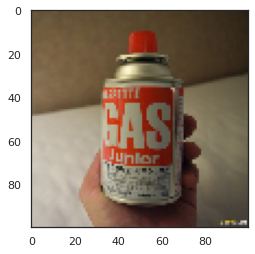

143.jpg    ------->   Predict:  plastic





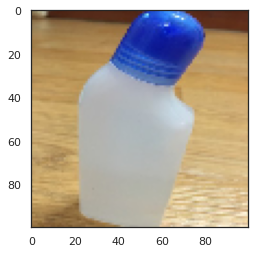

ic344.j    ------->   Predict:  metal





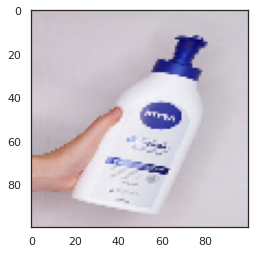

ic347.j    ------->   Predict:  metal





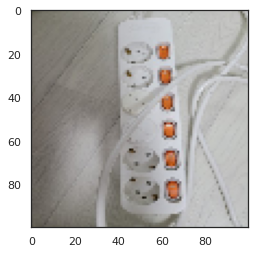

ic349.j    ------->   Predict:  metal





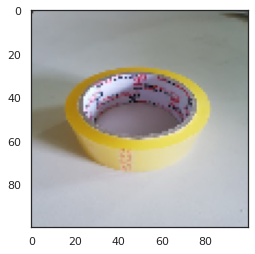

76.jpg    ------->   Predict:  metal





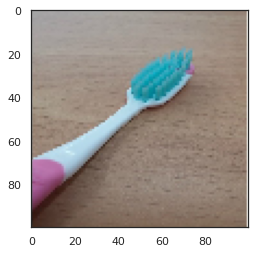

77.jpg    ------->   Predict:  metal





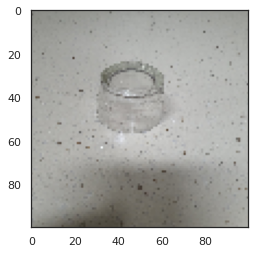

Talk_20    ------->   Predict:  metal





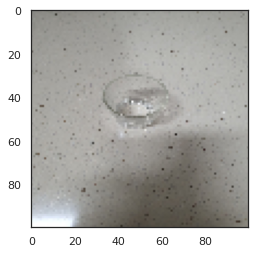

Talk_20    ------->   Predict:  metal





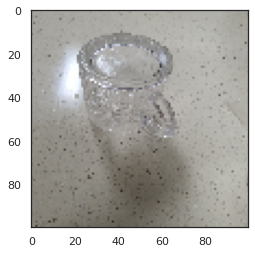

Talk_20    ------->   Predict:  metal





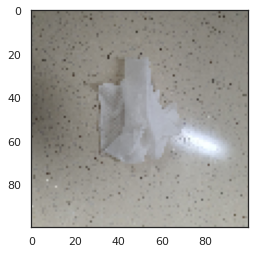

Talk_20    ------->   Predict:  metal





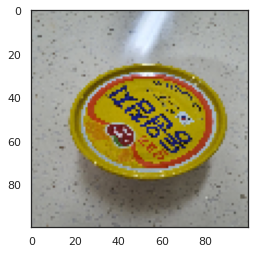

Talk_20    ------->   Predict:  metal





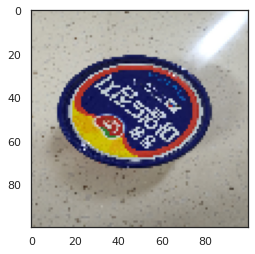

Talk_20    ------->   Predict:  metal





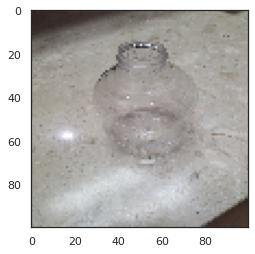

Talk_20    ------->   Predict:  metal





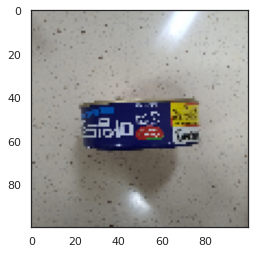

Talk_20    ------->   Predict:  metal





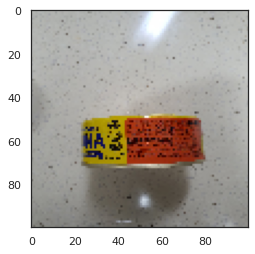

Talk_20    ------->   Predict:  metal





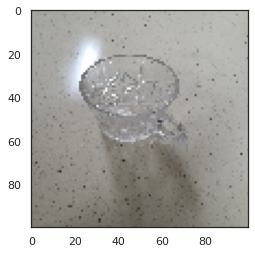

Talk_20    ------->   Predict:  metal





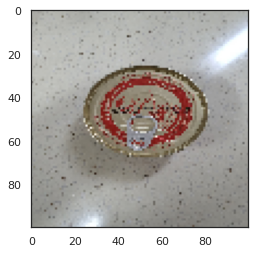

Talk_20    ------->   Predict:  metal





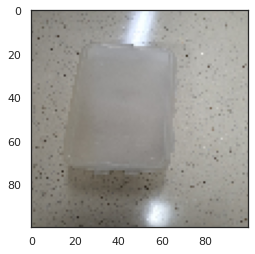

Talk_20    ------->   Predict:  metal





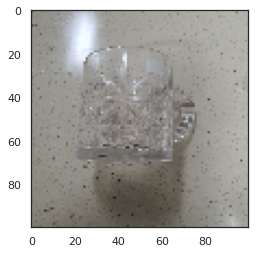

Talk_20    ------->   Predict:  metal





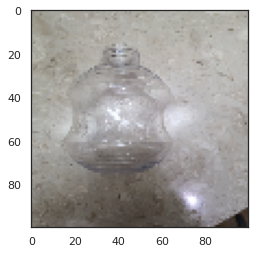

Talk_20    ------->   Predict:  metal





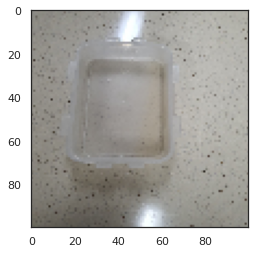

Talk_20    ------->   Predict:  metal





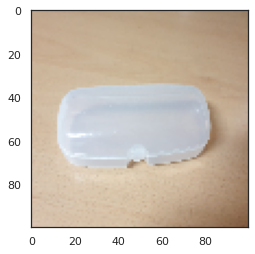

Talk_20    ------->   Predict:  metal





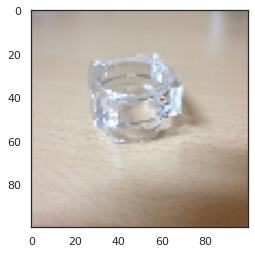

Talk_20    ------->   Predict:  metal





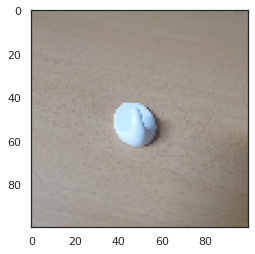

Talk_20    ------->   Predict:  metal





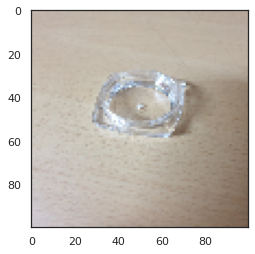

Talk_20    ------->   Predict:  metal





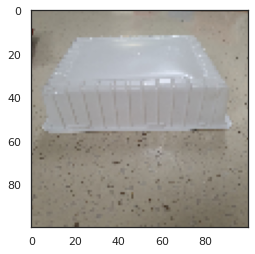

Talk_20    ------->   Predict:  metal





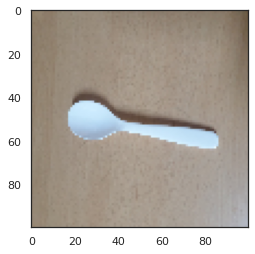

Talk_20    ------->   Predict:  metal





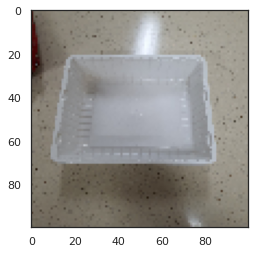

Talk_20    ------->   Predict:  metal





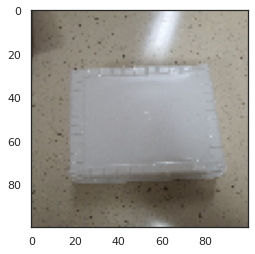

Talk_20    ------->   Predict:  metal





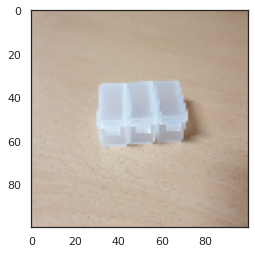

Talk_20    ------->   Predict:  metal





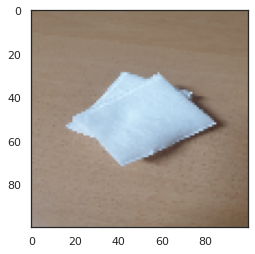

Talk_20    ------->   Predict:  metal





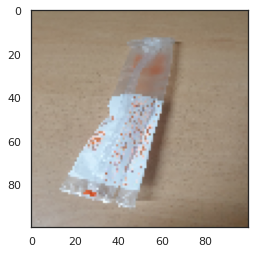

Talk_20    ------->   Predict:  metal





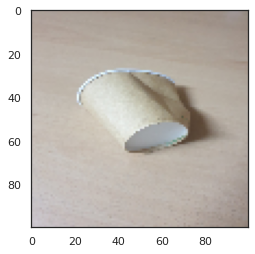

Talk_20    ------->   Predict:  metal





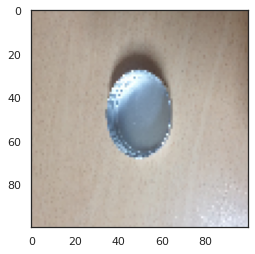

Talk_20    ------->   Predict:  metal





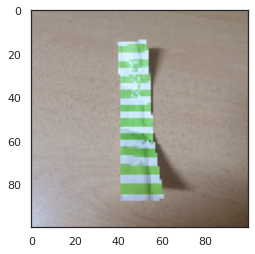

Talk_20    ------->   Predict:  metal





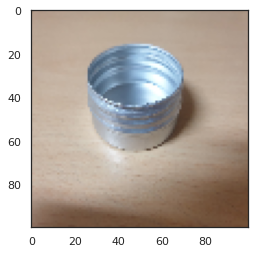

Talk_20    ------->   Predict:  plastic





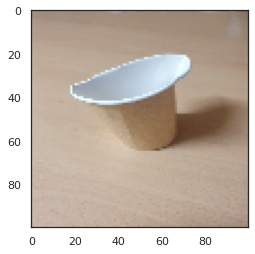

Talk_20    ------->   Predict:  metal





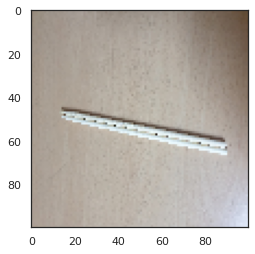

Talk_20    ------->   Predict:  metal





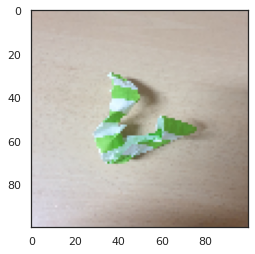

Talk_20    ------->   Predict:  metal





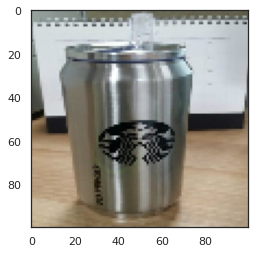

로드 -     ------->   Predict:  metal





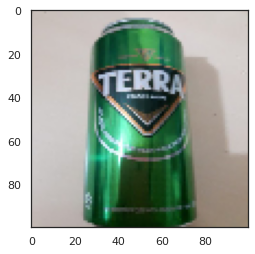

로드 (3    ------->   Predict:  metal





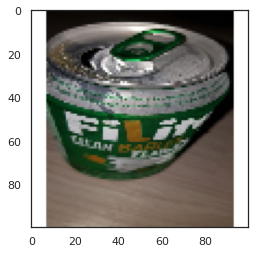

로드 (6    ------->   Predict:  metal





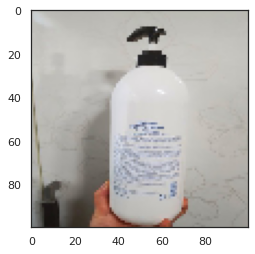

    ------->   Predict:  metal





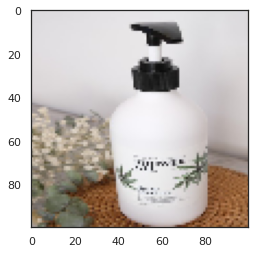

    ------->   Predict:  metal





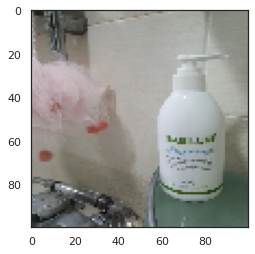

    ------->   Predict:  metal





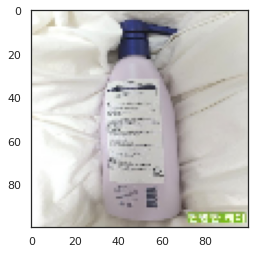

    ------->   Predict:  metal





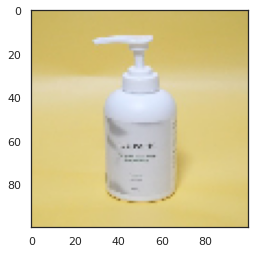

    ------->   Predict:  metal





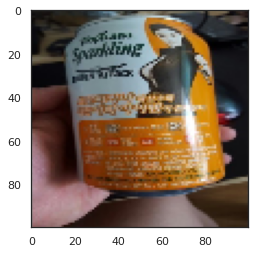

로드 -     ------->   Predict:  metal





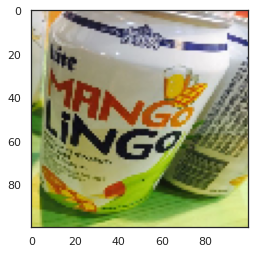

로드 -     ------->   Predict:  metal





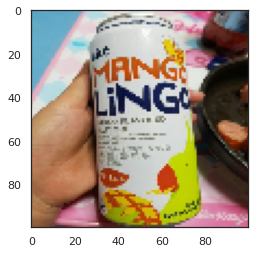

로드 -     ------->   Predict:  plastic





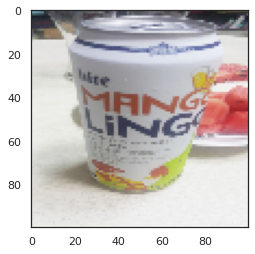

로드 -     ------->   Predict:  metal





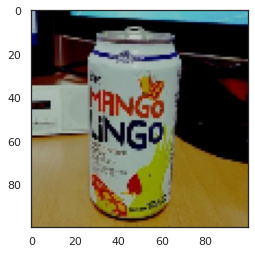

로드 -     ------->   Predict:  plastic





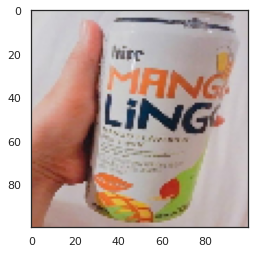

로드 -     ------->   Predict:  metal





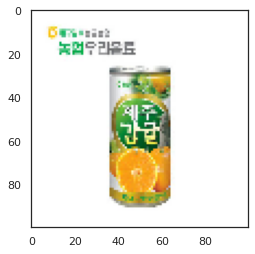

로드 -     ------->   Predict:  metal





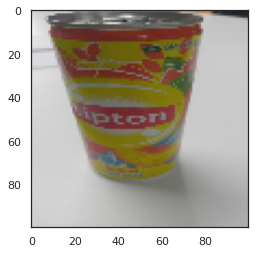

로드 -     ------->   Predict:  metal





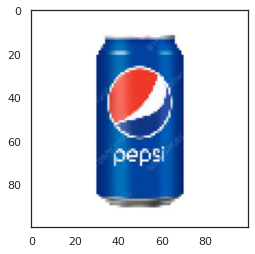

로드 -     ------->   Predict:  metal





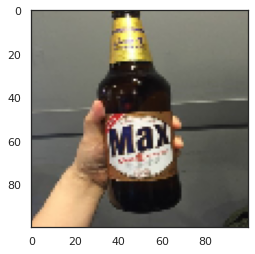

로드 -     ------->   Predict:  metal





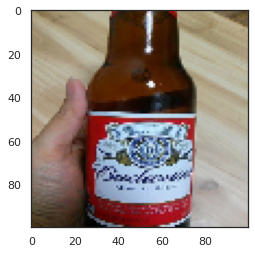

로드 -     ------->   Predict:  metal





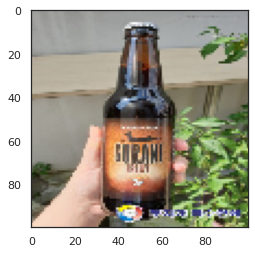

로드 -     ------->   Predict:  metal





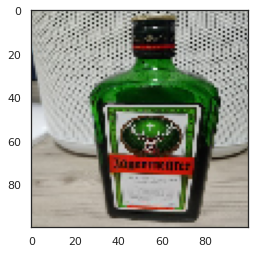

로드 -     ------->   Predict:  metal





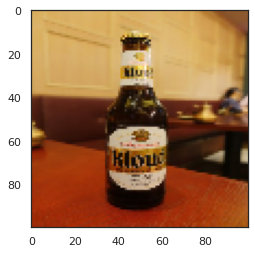

로드 -     ------->   Predict:  plastic





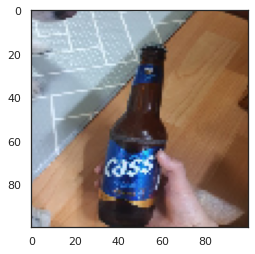

로드 -     ------->   Predict:  trash





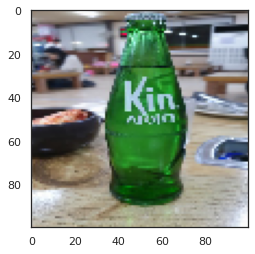

로드 (2    ------->   Predict:  metal





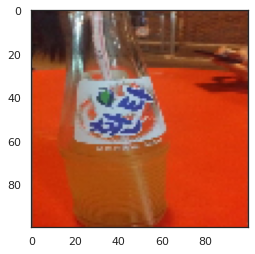

로드 (2    ------->   Predict:  plastic





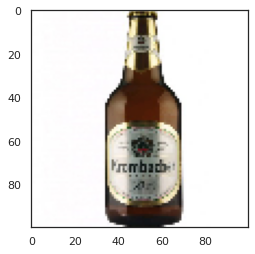

로드 -     ------->   Predict:  metal





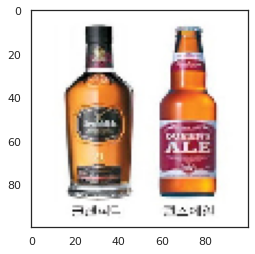

로드 -     ------->   Predict:  metal





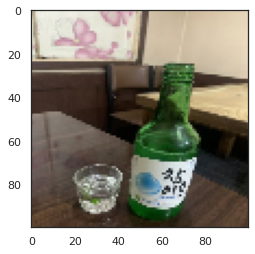

로드 -     ------->   Predict:  metal





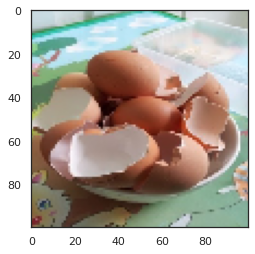

로드 (5    ------->   Predict:  metal





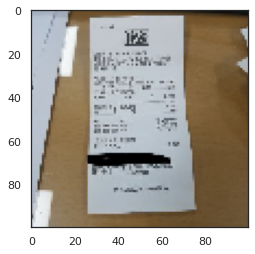

로드 (1    ------->   Predict:  metal





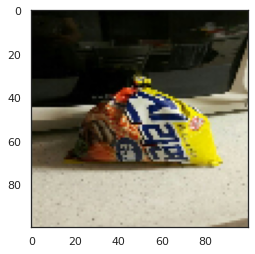

로드 (2    ------->   Predict:  metal





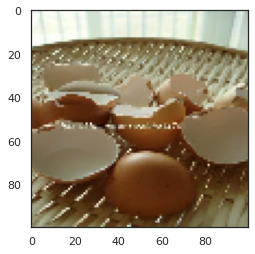

로드 (4    ------->   Predict:  plastic





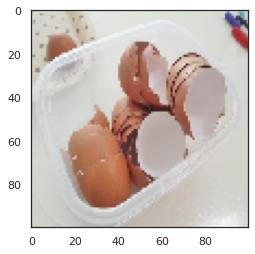

로드 (4    ------->   Predict:  metal





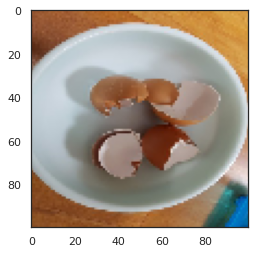

로드 (4    ------->   Predict:  metal





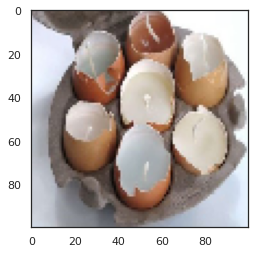

로드 (5    ------->   Predict:  metal





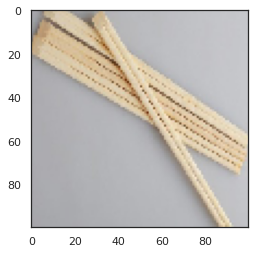

로드 (7    ------->   Predict:  metal





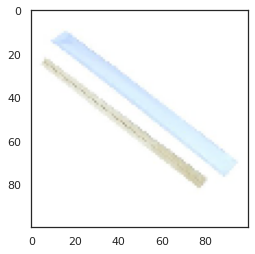

로드 (7    ------->   Predict:  metal





In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import glob

'''
img_data = image.load_img('/content/drive/MyDrive/Test/trash/1.jpg', target_size=(128,128))
plt.imshow(img_data)
plt.show()
'''
filenames =[]
test_image = glob.glob('/content/drive/MyDrive/R/*')
cnt=0

# 이미지 resize
for  f in test_image:
  img = Image.open(f)
  img = img.convert("RGB")
  img = img.resize((128,128))
  data = np.asarray(img)
  img_data = image.load_img(f,target_size=(100,100))

  plt.imshow(img_data)
  plt.show()
#  filenames.append(f)

  X = np.array(data)
  X = X.astype("float") / 256
  X = X.reshape(-1, 128, 128,3)

# 예측
  pred = model.predict(X)  
  result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
  print( f[30:37] +'    ------->   Predict: ', categories[result[0]])
  print('\n\n')
  cnt+=1

In [ ]:
#.h5파일 -> .pb파일 변환
import tensorflow as tf 
from tensorflow import keras
model = tf.keras.models.load_model('/content/drive/MyDrive/Model/7Drop_Trash1.0.h5', compile=False, custom_objects={'Activation':Activation})

export_path = './Trash1.0.pb'
model.save(export_path, save_format="tf")

In [ ]:
#.pb파일 -> .tflite파일로 변환


saved_model_dir = './pb'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()
open('./Trash1.0.tflite', 'wb').write(tflite_model)

962416